# 2022-08-26 Riddler

## Express

In [32]:
import math
import random

import matplotlib.pyplot as plt
import pandas as pd

In [20]:
def play(N):
    if random.randrange(N) == 0:
        return False
    else:
        return True

In [21]:
def play1():
    if play(10):
        return 1
    else:
        return 0

In [22]:
def test(f, days=10000):
    wins = 0
    for _ in range(days):
        wins += f()
    #print(wins)
    #print(days)
    return wins/days

test(play1)

0.898

In [6]:
class PlayI():
    def __init__(self, i, n=10):
        self.i = i
        self.n = n
        
    def run(self):
        for _ in range(self.i):
            if play(self.n) is False:
                return 0
        return self.i

play2 = PlayI(2)

test(play2.run)

1.62018

In [23]:
play3 = PlayI(3)
test(play3.run)

2.1795

We can also do this analytically. In general the average score you will get if you play $i$ times a day will be:

$\langle s \rangle = i(\frac{n-1}{n})^{i}$

Let's check that the analytic solution matches the simulation:

In [24]:
def predi(i, n=10):
    return i * ((n-1)/n)**i

In [25]:
out = [] 
for i in range(1, 20):
    p = PlayI(i)
    out.append({'i': i, 'wins': test(p.run), 'pred': predi(i)})
df = pd.DataFrame(out)
df

,i,wins,pred
0,1,0.9043,0.900000
1,2,1.6286,1.620000
2,3,2.1921,2.187000
3,4,2.5916,2.624400
4,5,2.9350,2.952450
5,6,3.2124,3.188646
6,7,3.3712,3.348078
7,8,3.4312,3.443738
8,9,3.4974,3.486784
9,10,3.5530,3.486784


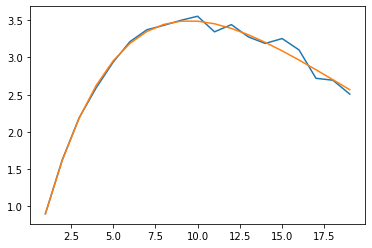

In [27]:
plt.plot(df["i"], df["wins"])
plt.plot(df["i"], df["pred"])
plt.show()

/home/mzimmerman/local/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/mzimmerman/local/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/mzimmerman/local/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


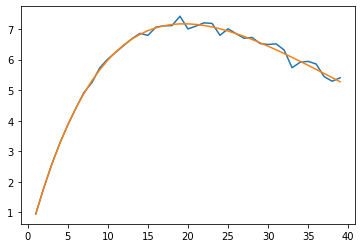

In [29]:
out = [] 
for i in range(1, 40):
    p = PlayI(i, 20)
    out.append({'i': i, 'wins': test(p.run), 'pred': predi(i, 20)})
df20 = pd.DataFrame(out)
df20
plt.plot(df20["i"], df20["wins"])
plt.plot(df20["i"], df20["pred"])
plt.show()

Let's calculate the derivative of our analytic function:

$\langle s \rangle = i (\frac{n-1}{n})^i$

$\frac{d \langle s \rangle}{di} = (\frac{n-1}{n})^i ( \ln{(\frac{n-1}{n}})i + 1)$

Which has a zero at:

$i = -\frac{1}{\ln{(1-\frac{1}{n})}}$

In [34]:
def predi0(n):
    return -1 / math.log(1 - 1/n)

In [35]:
predi0(10)

9.491221581029905

In [37]:
predi0(11)

10.492058687257066

In [38]:
predi0(20)

19.495725746223673

What's interesting is that the peak in $s$ appears to be almost halfway between $i = n-1$ and $i = n$. Perhaps alternating between playing $n-1$ times on one day and $n$ times on the next would produce slightly better results?